###### Overview

Verizonet, a telecommunications company based in California, has been operating for six years,
providing phone and internet services to customers across more than a thousand cities and zip
codes. Despite a highly skilled sales team successfully attracting new clients, the company faces a
significant challenge: a high customer attrition rate. At the end of the last quarter, only 43% of newly
acquired customers chose to continue their services, resulting in a decrease in the total customer
base.

To address this issue, we are analyzing the dataset



primary objectives are :
to analyze the dataset, identify factors drivingcustomer turnover
develop an accurate Machine Learning model to predict potential departures,
and recommend customized retention strategies.

The other  objectives of this exercise is : 
to build a model to predict the customer who can depart, using historical data Focus on all steps of data science (EDA, data processing, model, evaluation, charts)
1. Highlight any trend in data and deep insights
2. Highlight next steps and improvements.
3. Apply classification machine learning algorithms and evaluate it

# Data Exploration and Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Necessary Libraries and loading the data set for the exercise

In [2]:
df=pd.read_csv("verizonet_data.csv")
df

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,No,0,72,NaN,Yes,22.77,No,No,NaN,...,Landers,92285,2182,0,5306,NaN,NaN,0,0,NaN
7039,6840-RESVB,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,...,Adelanto,92301,18980,0,2140,NaN,NaN,2,0,NaN
7040,2234-XADUH,Yes,4,72,NaN,Yes,29.66,Yes,Yes,Cable,...,Amboy,92304,42,0,5560,NaN,NaN,2,0,4.0
7041,4801-JZAZL,Yes,1,11,NaN,No,0.00,No,Yes,DSL,...,Angelus Oaks,92305,301,0,2793,NaN,NaN,0,0,NaN


# inspecting columns and  Data pre processing

In [3]:
df.columns

Index(['Customer ID', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Regular Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Gender', 'Age', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'City', 'Zip Code',
       'Population', 'Churn Status', 'CLTV', 'Churn Category', 'Churn Reason',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Customer Satisfaction rate'],
      dtype='object')

In [4]:
df.shape[1]
#checking how many features

43

Features like Customer ID,City,Zip Code may not provide meaningful information for predicting churn customer status
so it can be removed.

In [5]:
df = df.drop(['Customer ID', 'City', 'Zip Code'], axis=1)


checking data types

In [6]:
df.dtypes

Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless Billing                     object
Payment Method                        object
Monthly Charge                       float64
Total Regu

checking missing values

In [7]:

df.isnull().sum()



Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges                   0
Total Refunds                     

Here Offer column coontains null values , we are going to replace it with No offer taken since it can be seen as none in excel

In [8]:
df['Offer'].fillna('No Offer', inplace=True)


In [9]:
#Checking

In [10]:
df['Offer'].value_counts()


Offer
No Offer    3877
Offer B      824
Offer E      805
Offer D      602
Offer A      520
Offer C      415
Name: count, dtype: int64

now checking null values in internet type

In [11]:
df[df['Internet Type'].isnull()]



,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Married,Dependents,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
25,Yes,1,11,No Offer,Yes,29.54,No,No,NaN,0,...,Yes,No,34902,1,5888,Competitor,Competitor made better offer,2,0,NaN
41,No,0,8,No Offer,Yes,27.95,No,No,NaN,0,...,No,No,626,1,5432,Attitude,Attitude of support person,6,0,NaN
199,No,0,1,No Offer,Yes,22.92,No,No,NaN,0,...,No,No,15975,1,3848,Dissatisfaction,Limited range of services,1,0,NaN
373,No,0,1,Offer E,Yes,19.87,No,No,NaN,0,...,No,No,798,1,3491,Price,Long distance charges,4,0,NaN
375,Yes,1,1,Offer E,Yes,22.86,No,No,NaN,0,...,Yes,No,1328,1,3817,Attitude,Attitude of support person,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,No,0,51,Offer B,Yes,19.23,No,No,NaN,0,...,No,No,732,0,4725,NaN,NaN,1,0,3.0
7027,No,0,39,Offer C,Yes,1.57,No,No,NaN,0,...,No,No,29340,0,2007,NaN,NaN,1,1,NaN
7028,Yes,2,12,No Offer,Yes,25.33,No,No,NaN,0,...,Yes,Yes,24924,0,3101,NaN,NaN,0,0,NaN
7034,No,0,2,Offer E,Yes,6.85,No,No,NaN,0,...,No,No,48690,0,5191,NaN,NaN,1,0,3.0


Customer those who are not have a internet type connection have  are taking phone service  so filling with no internet as we seen no internet and on intenet data consumption from them

In [12]:
df['Internet Type'].fillna('No Internet', inplace=True)

In [13]:
df['Internet Type'].value_counts()

Internet Type
Fiber Optic    2291
DSL            1680
Cable          1546
No Internet    1526
Name: count, dtype: int64

In [14]:
df['Churn Category'].value_counts()

Churn Category
Competitor         841
Attitude           314
Dissatisfaction    303
Price              211
Other              200
Name: count, dtype: int64

now inspecting  null values in Churn Category

In [15]:
df[df['Churn Category'].isnull()]

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Married,Dependents,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
476,Yes,3,71,No Offer,Yes,47.02,Yes,Yes,Fiber Optic,12,...,Yes,No,49431,0,5309,NaN,NaN,0,0,NaN
477,Yes,10,2,Offer E,Yes,33.10,No,Yes,Fiber Optic,11,...,Yes,No,58218,0,4449,NaN,NaN,1,0,5.0
478,No,0,1,Offer E,Yes,11.89,No,Yes,DSL,12,...,No,No,56709,0,3144,NaN,NaN,0,0,NaN
479,No,0,43,Offer B,Yes,12.58,Yes,Yes,Fiber Optic,26,...,No,No,38128,0,2223,NaN,NaN,1,0,NaN
480,Yes,9,25,No Offer,Yes,30.60,Yes,Yes,DSL,2,...,Yes,No,29299,0,3154,NaN,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,0,72,No Offer,Yes,22.77,No,No,No Internet,0,...,No,No,2182,0,5306,NaN,NaN,0,0,NaN
7039,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,24,...,Yes,Yes,18980,0,2140,NaN,NaN,2,0,NaN
7040,Yes,4,72,No Offer,Yes,29.66,Yes,Yes,Cable,59,...,Yes,Yes,42,0,5560,NaN,NaN,2,0,4.0
7041,Yes,1,11,No Offer,No,0.00,No,Yes,DSL,17,...,Yes,Yes,301,0,2793,NaN,NaN,0,0,NaN


Customer those who are not have a valid Churn Category and churn reason can be treated as unknown

In [16]:
df['Churn Category'].fillna('Unknown', inplace=True)
df['Churn Reason'].fillna('Unknown', inplace=True)

In [17]:
df['Churn Category'].value_counts()


Churn Category
Unknown            5174
Competitor          841
Attitude            314
Dissatisfaction     303
Price               211
Other               200
Name: count, dtype: int64

In [18]:
df['Churn Status'].value_counts()



Churn Status
0    5174
1    1869
Name: count, dtype: int64

In [19]:
df['Churn Reason'].value_counts()


Churn Reason
Unknown                                      5174
Competitor had better devices                 313
Competitor made better offer                  311
Attitude of support person                    220
Don't know                                    130
Competitor offered more data                  117
Competitor offered higher download speeds     100
Attitude of service provider                   94
Price too high                                 78
Product dissatisfaction                        77
Network reliability                            72
Long distance charges                          64
Service dissatisfaction                        63
Moved                                          46
Extra data charges                             39
Limited range of services                      37
Poor expertise of online support               31
Lack of affordable download/upload speed       30
Lack of self-service on Website                29
Poor expertise of phone support      

now checking customers satisfaction rate

In [20]:
df['Customer Satisfaction rate'].value_counts()

Customer Satisfaction rate
3.0    675
4.0    380
1.0    332
5.0    247
2.0    200
Name: count, dtype: int64

In [21]:
df[df['Customer Satisfaction rate'].isnull()]

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Married,Dependents,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,No,0,1,No Offer,No,0.00,No,Yes,Fiber Optic,9,...,No,No,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,...,Yes,Yes,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,...,No,Yes,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
5,No,0,27,Offer C,Yes,3.33,Yes,Yes,Fiber Optic,20,...,No,Yes,63288,1,4638,Competitor,Competitor had better devices,0,0,NaN
6,Yes,1,1,Offer E,Yes,15.28,No,Yes,Cable,33,...,Yes,Yes,21343,1,3964,Other,Don't know,7,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,No,0,12,No Offer,No,0.00,No,Yes,Fiber Optic,24,...,No,No,20486,0,3740,Unknown,Unknown,0,0,NaN
7038,No,0,72,No Offer,Yes,22.77,No,No,No Internet,0,...,No,No,2182,0,5306,Unknown,Unknown,0,0,NaN
7039,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,24,...,Yes,Yes,18980,0,2140,Unknown,Unknown,2,0,NaN
7041,Yes,1,11,No Offer,No,0.00,No,Yes,DSL,17,...,Yes,Yes,301,0,2793,Unknown,Unknown,0,0,NaN


About 60% of the values doesn't contains customer satisfacton rate. so droping these rows won't be a effective tactics.

In [22]:
df['Customer Satisfaction rate'].describe()

count    1834.000000
mean        3.005453
std         1.256938
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Customer Satisfaction rate, dtype: float64

In [23]:
df['Customer Satisfaction rate'].value_counts()

Customer Satisfaction rate
3.0    675
4.0    380
1.0    332
5.0    247
2.0    200
Name: count, dtype: int64

In [24]:
df['Customer Satisfaction rate'].mean()


3.005452562704471

In [25]:
df['Customer Satisfaction rate'].mode()


0    3.0
Name: Customer Satisfaction rate, dtype: float64

In [26]:
df['Customer Satisfaction rate'].median()

3.0

The mean (average) of a data set is found by adding all numbers in the data set and then dividing by the number of values in the set. The median is the middle value when a data set is ordered from least to greatest. The mode is the number that occurs most often in a data set.

hence we can fill null values with the mean, mode, or median in our case,  the mean, mode, and median for the 'Customer Satisfaction Rate' feature are 3, it suggests that 3 is a central or typical value for this feature.




In [27]:
df['Customer Satisfaction rate'].fillna(3, inplace=True)




In [28]:
df.isnull().sum()

Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Regular Charges                0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charg

In [29]:
df[df['Customer Satisfaction rate'].isnull()]


,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Married,Dependents,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate


just checking whether churn status conatins null values

analysing with correlation of numerical features with respect to 'Churn Status' using bar charts . numerical features means continous values that can be measured on a scale. correlation is a method  to find the pairwise correlation of all the columns in the dataset

identifying which are the numerical fetures in the data set

In [30]:
numeric_features = df.select_dtypes(include=np.number).columns
numeric_features


Index(['Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Regular Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges', 'Age',
       'Population', 'Churn Status', 'CLTV', 'Total Customer Svc Requests',
       'Product/Service Issues Reported', 'Customer Satisfaction rate'],
      dtype='object')

calculating correlation between these features and churn status

In [31]:
# Calculating correlation matrix
correlation_matrix = df[numeric_features].corr()
# Correlation with target variable ('Churn Status')
correlation_with_churn = correlation_matrix['Churn Status']
correlation_with_churn

Number of Referrals                 -0.286540
Tenure in Months                    -0.352861
Avg Monthly Long Distance Charges    0.008120
Avg Monthly GB Download              0.094932
Monthly Charge                       0.232339
Total Regular Charges               -0.198546
Total Refunds                       -0.033709
Total Extra Data Charges             0.006227
Total Long Distance Charges         -0.223756
Age                                  0.115760
Population                           0.051649
Churn Status                         1.000000
CLTV                                -0.127463
Total Customer Svc Requests          0.536605
Product/Service Issues Reported      0.399422
Customer Satisfaction rate          -0.434619
Name: Churn Status, dtype: float64

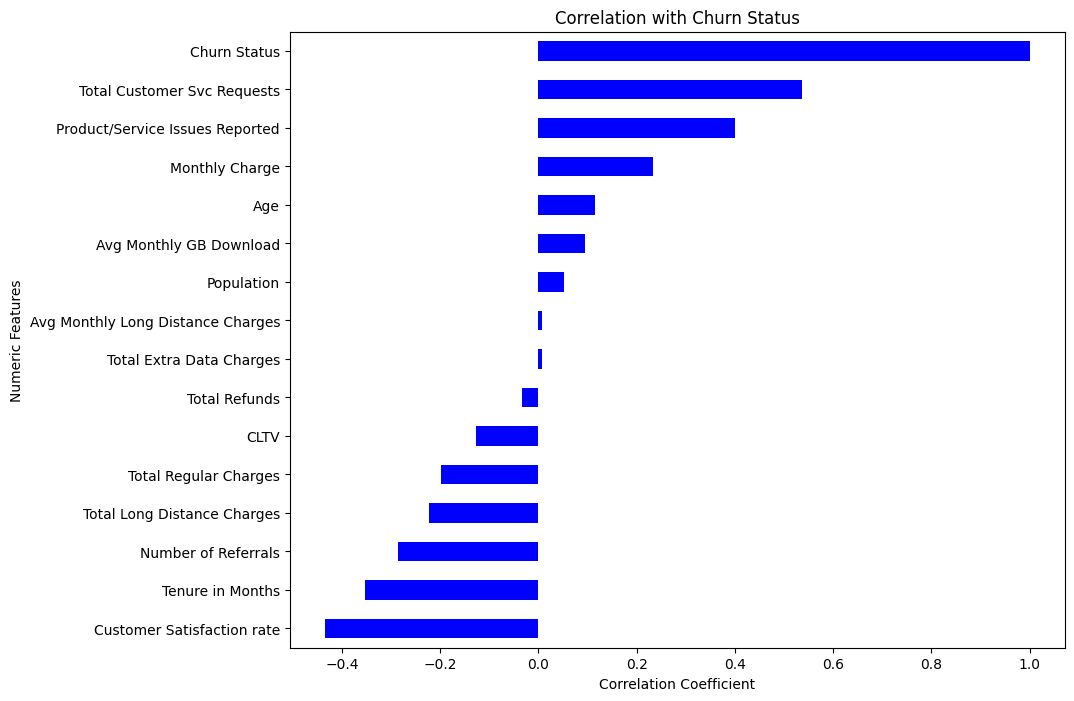

In [32]:
# Visualizing correlations with 'Churn Status'
correlation_with_churn = correlation_with_churn.sort_values()
correlation_with_churn.plot(kind='barh', figsize=(10, 8), color='blue')
plt.title('Correlation with Churn Status')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Numeric Features')
plt.show()


The correlation coefficients indicate the strength and direction of the linear relationship between each numeric feature and the target variable ('Churn Status')

Negative Correlations:
A negative correlation indicates an inverse relationship.  'Number of Referrals', 'Tenure in Months', 'Total Regular Charges', 'Total Long Distance Charges', and 'CLTV'are -ve correlation as this  decrease, the likelihood of churn (Churn Status = 1) tends to increase. These features are negatively correlated with the Churn Status.

Positive Correlations:
A positive correlation indicates a direct relationship. 'Monthly Charge', 'Age', 'Population', 'Total Customer Svc Requests', and 'Product/Service Issues Reported' features are +ve correlation as these increase, the likelihood of churn tends to increase. These features are positively correlated with the Churn Status.

Weak Correlations:
Avg Monthly Long Distance Charges, Avg Monthly GB Download, Total Refunds, and Total Extra Data Charges have correlations close to zero. that means no impact to churn status with these features.                                                                                                                                                                                               

                                                                                                                                The magnitude of the correlation coefficient indicates the strength of the relationship: closer to 1 or -1 indicates a     stronger correlation, and closer to 0 indicates a weaker correlation.

so now onwards we are not considering these numerical features only.other numerical features are droping as taking conclusion that these features will comapratively only impact on churn status ie our target variable

In [33]:
columns_to_drop = ['Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Total Refunds', 'Total Extra Data Charges','Population']
df.drop(columns=columns_to_drop, inplace=True)


In [34]:
numeric_features = df.select_dtypes(include=np.number).columns
numeric_features

Index(['Number of Referrals', 'Tenure in Months', 'Monthly Charge',
       'Total Regular Charges', 'Total Long Distance Charges', 'Age',
       'Churn Status', 'CLTV', 'Total Customer Svc Requests',
       'Product/Service Issues Reported', 'Customer Satisfaction rate'],
      dtype='object')

# Feature scaling

Feature scaling is a data preprocessing technique used to transform the values of features or variables in a dataset to a similar scale. The purpose is to ensure that all features contribute equally to the model and better perfomance of the model                                                                                                                                      In our dataset, we have various numerical features with different scales, such as "No. of referrals," "Tenure in months," "age," etc. n situations where the features have different units or scales. 

In [35]:
numeric_features = df.select_dtypes(include=np.number).columns
numeric_features


Index(['Number of Referrals', 'Tenure in Months', 'Monthly Charge',
       'Total Regular Charges', 'Total Long Distance Charges', 'Age',
       'Churn Status', 'CLTV', 'Total Customer Svc Requests',
       'Product/Service Issues Reported', 'Customer Satisfaction rate'],
      dtype='object')

just selecting columns for feature scaling

In [36]:
numeric_features_without_churn = numeric_features.drop('Churn Status', errors='ignore')
numeric_features_without_churn 

Index(['Number of Referrals', 'Tenure in Months', 'Monthly Charge',
       'Total Regular Charges', 'Total Long Distance Charges', 'Age', 'CLTV',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Customer Satisfaction rate'],
      dtype='object')

# Standard Scaler, 
 StandardScaler, is a preprocessing technique used in machine learning to standardize the features of a dataset. Standardization is a method where the features are transformed to have zero mean and a standard deviation of 1. This process involves subtracting the mean of each feature and dividing by its standard deviation.
The goal of standardization is to transform the features so that they have the same scale.

The StandardScaler class in scikit-learn provides a convenient way to apply standardization to a dataset. It computes the mean and standard deviation of each feature during the fitting process and then applies the transformation. After standardization, the features will have a mean of 0 and a standard deviation of 1.

In [37]:
numeric_features_without_churn = numeric_features.drop('Churn Status', errors='ignore')
numeric_features_without_churn 

Index(['Number of Referrals', 'Tenure in Months', 'Monthly Charge',
       'Total Regular Charges', 'Total Long Distance Charges', 'Age', 'CLTV',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Customer Satisfaction rate'],
      dtype='object')

In [38]:
df[numeric_features_without_churn].dtypes

Number of Referrals                  int64
Tenure in Months                     int64
Monthly Charge                     float64
Total Regular Charges              float64
Total Long Distance Charges        float64
Age                                  int64
CLTV                                 int64
Total Customer Svc Requests          int64
Product/Service Issues Reported      int64
Customer Satisfaction rate         float64
dtype: object

just checking if all the features are numeric datatypes

In [39]:

from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()



# Fit the scaler on the data
scaler.fit(df[numeric_features_without_churn])

# Transform the data
scaled_data = scaler.transform(df[numeric_features_without_churn])

# Print the scaled data
scaled_data

array([[-6.50408550e-01, -1.27898775e+00, -7.94088944e-01, ...,
         2.55963454e+00, -4.29440007e-01, -2.21423108e-03],
       [-3.17184762e-01, -9.93742883e-01,  5.99164189e-01, ...,
         2.55963454e+00, -4.29440007e-01, -2.21423108e-03],
       [-6.50408550e-01, -5.86250212e-01,  1.10209459e+00, ...,
        -2.36845110e-01, -4.29440007e-01, -2.21423108e-03],
       ...,
       [ 6.82486603e-01,  1.61421021e+00,  1.23057187e+00, ...,
         4.62274803e-01, -4.29440007e-01,  1.55726872e+00],
       [-3.17184762e-01, -8.71495082e-01, -1.17429282e+00, ...,
        -9.35965023e-01, -4.29440007e-01, -2.21423108e-03],
       [-6.50408550e-01,  1.36971461e+00,  1.31062511e+00, ...,
        -2.36845110e-01,  2.35815996e+00, -2.21423108e-03]])

Now exploring caegorical varibales

In [40]:
categorical_features = df.select_dtypes(include=['object']).columns


these are the categorical features in our data set

In [41]:
categorical_features

Index(['Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Gender', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'Churn Category',
       'Churn Reason'],
      dtype='object')

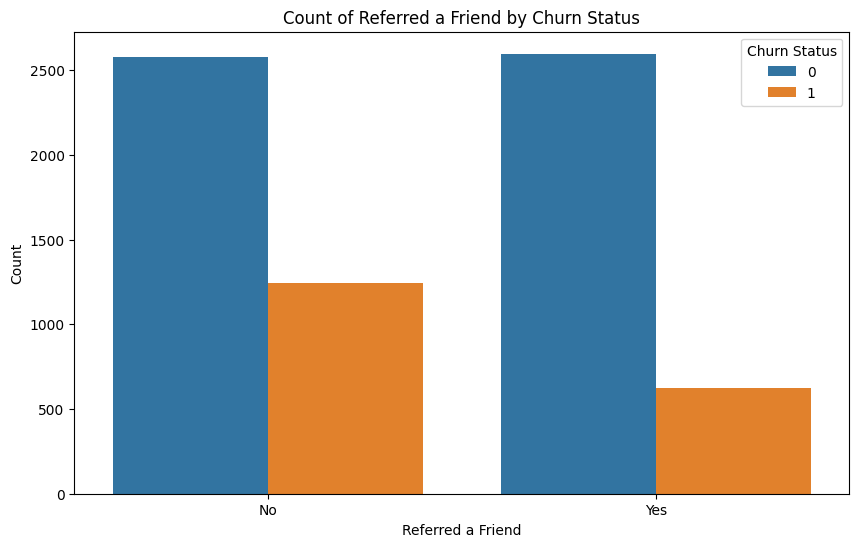

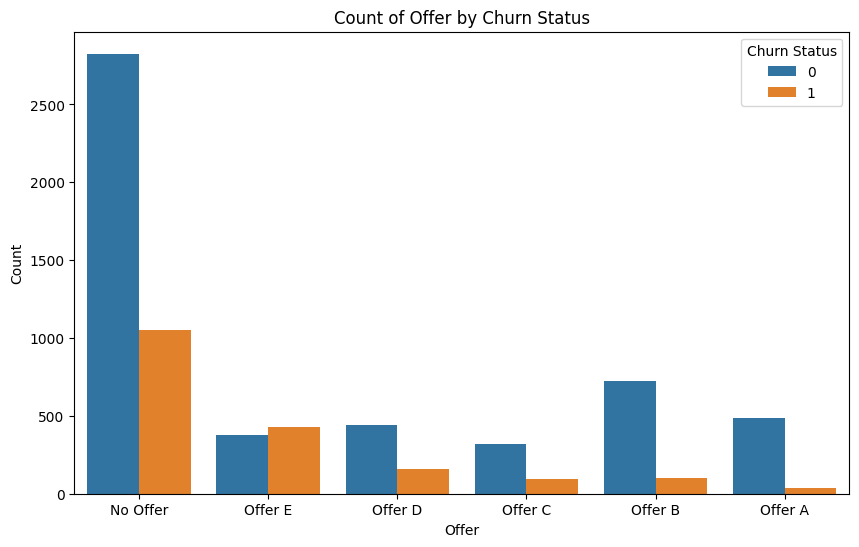

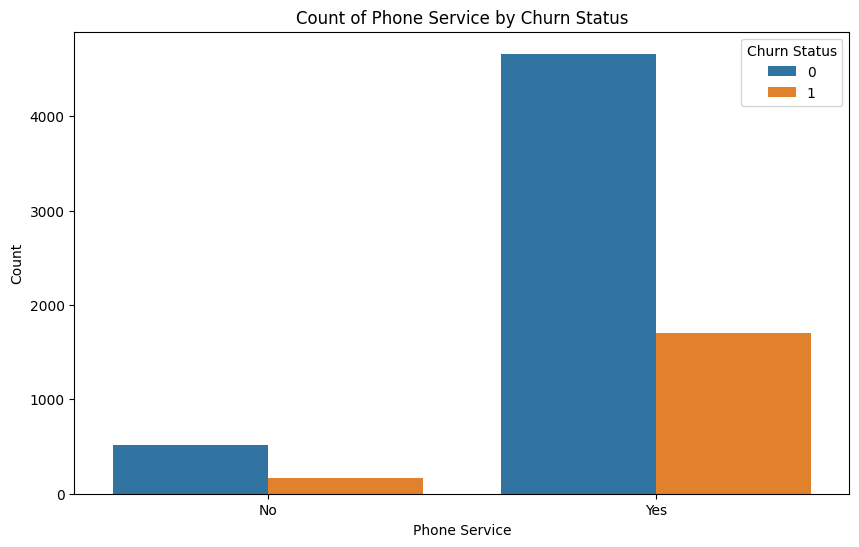

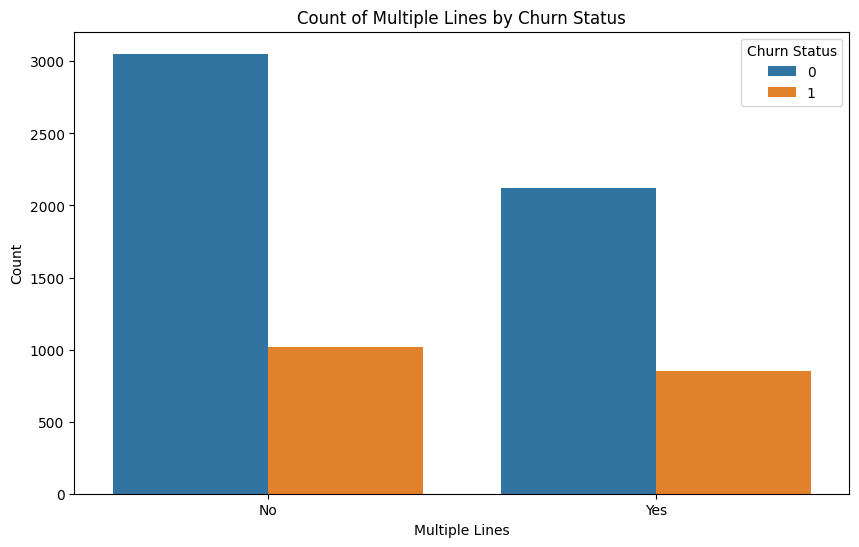

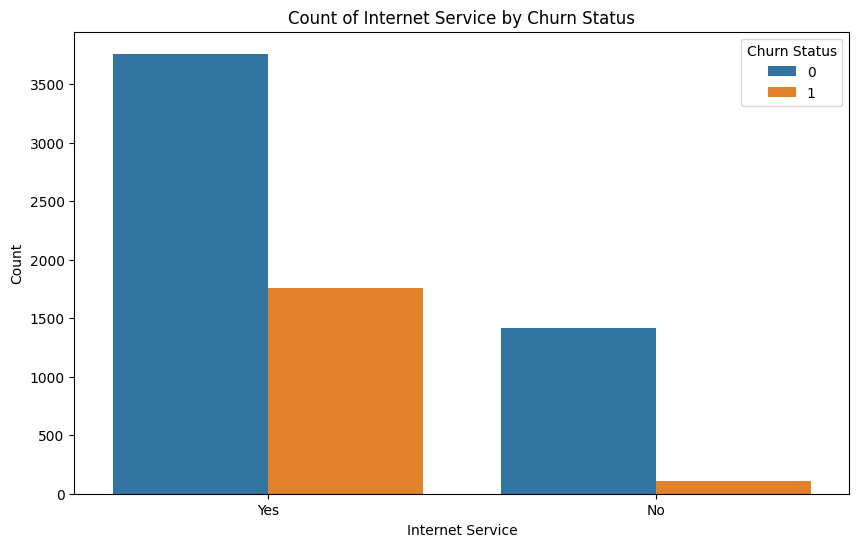

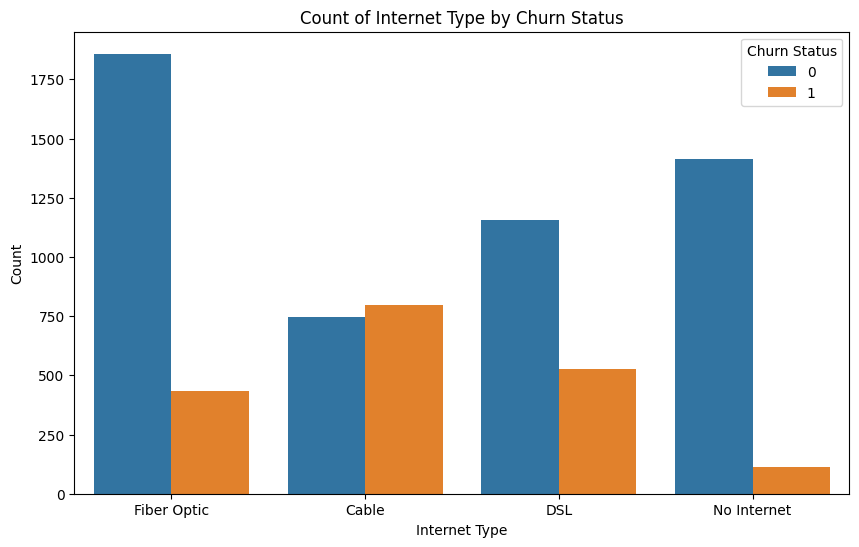

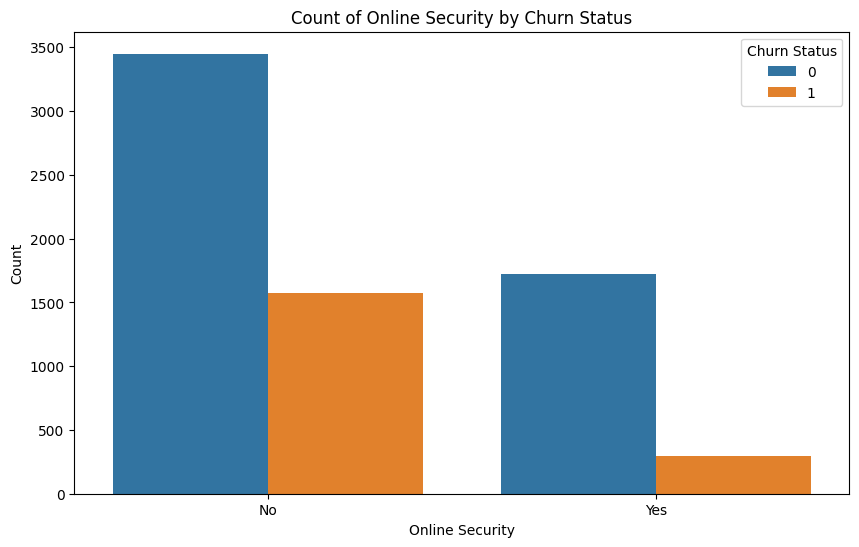

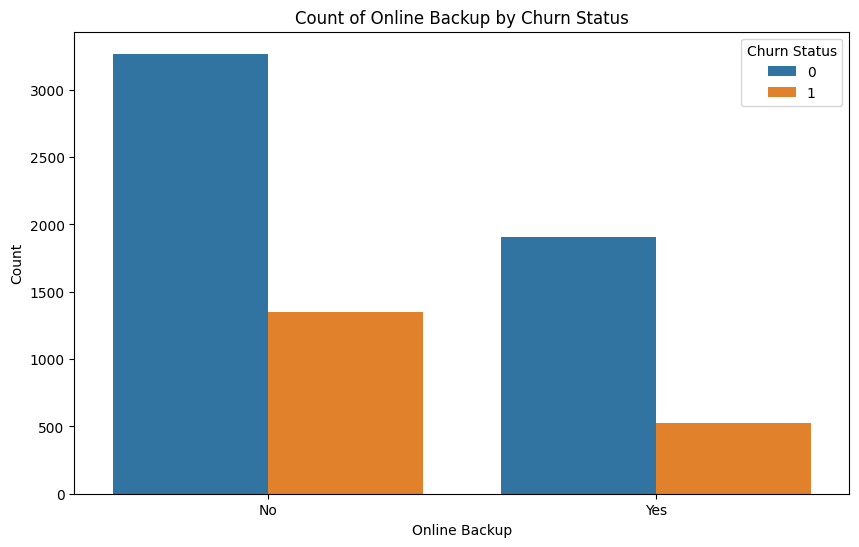

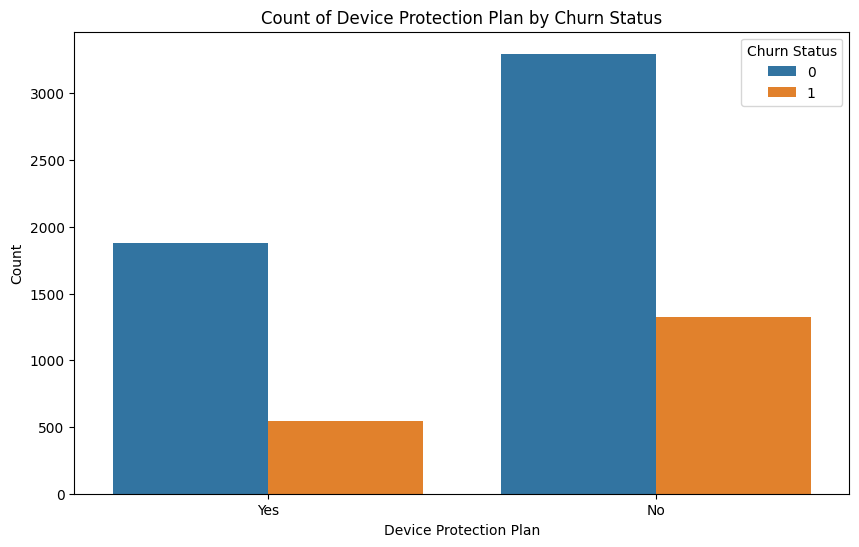

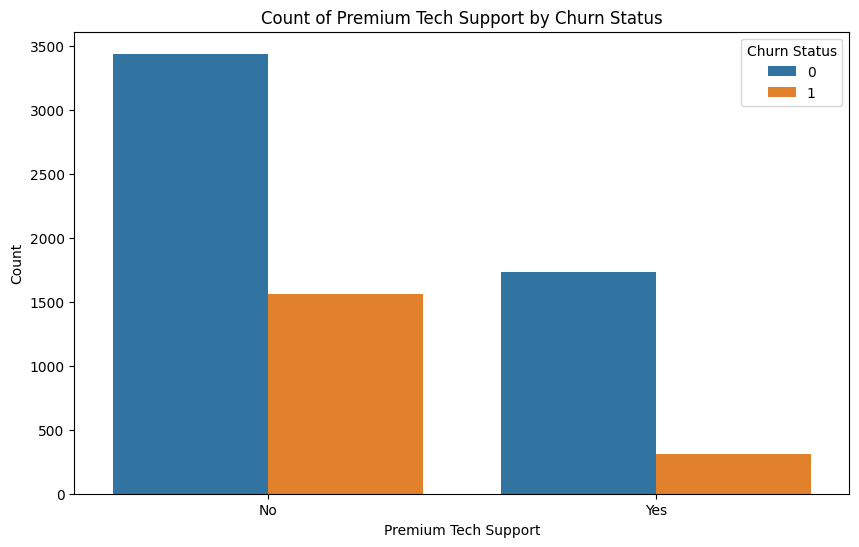

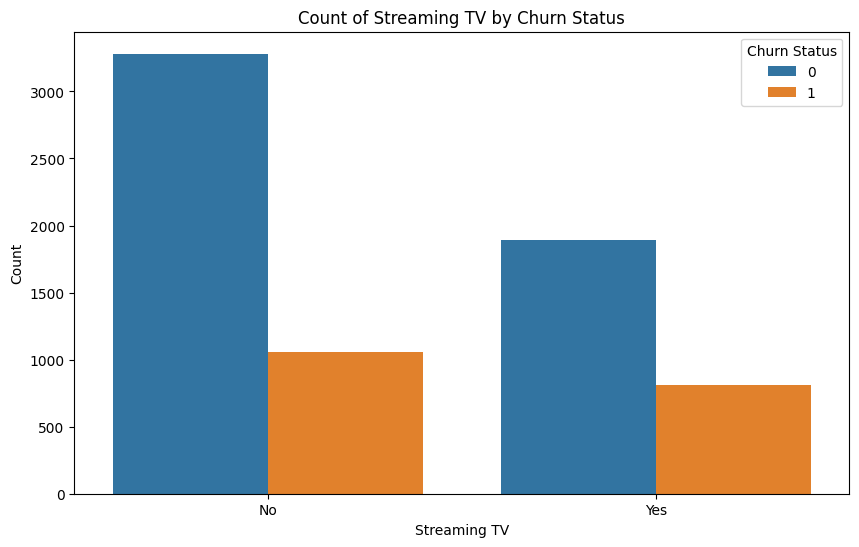

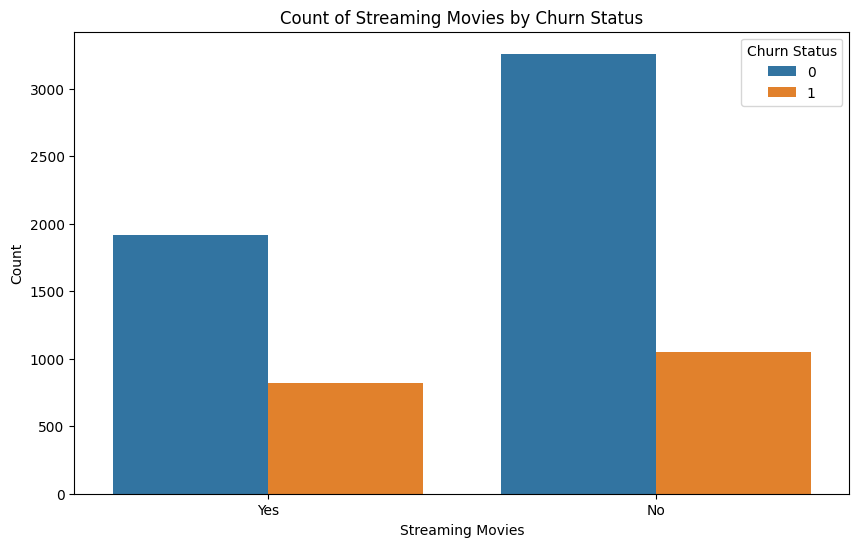

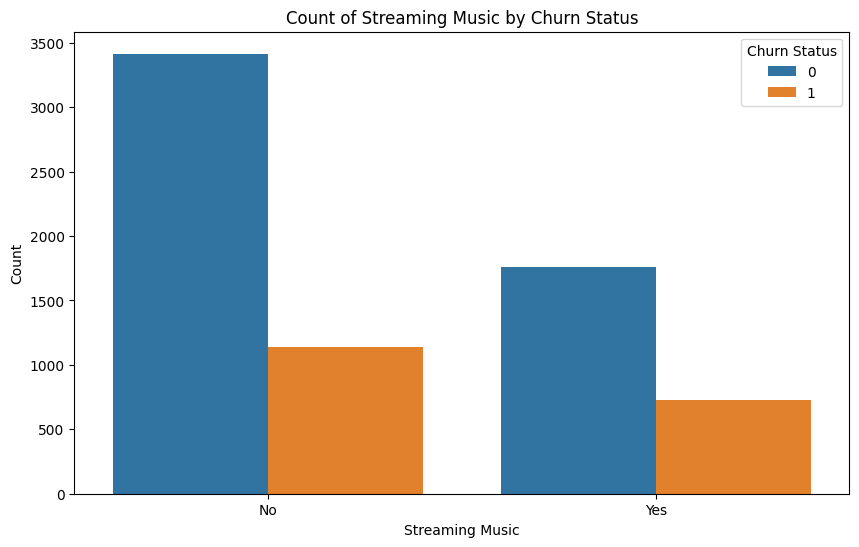

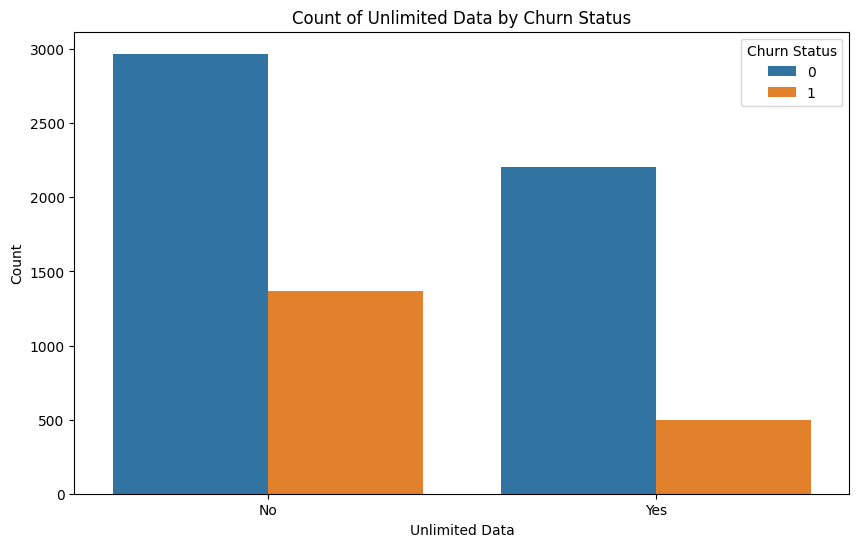

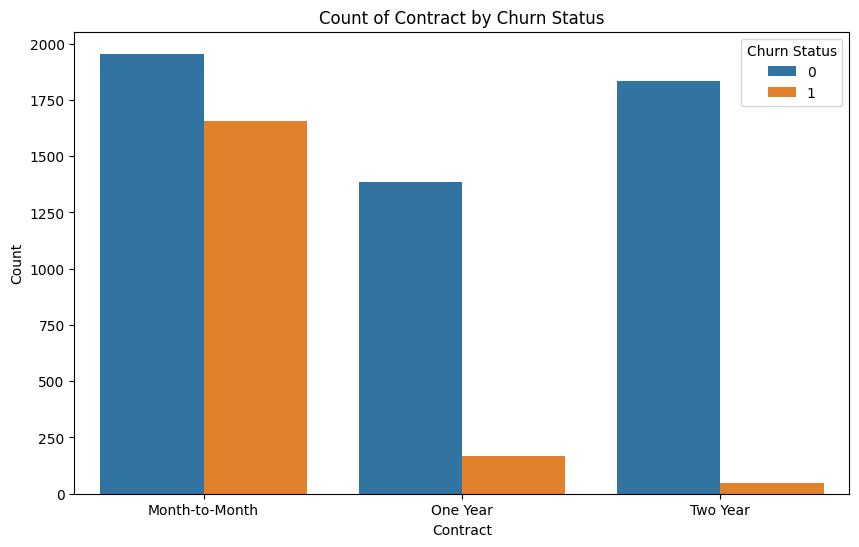

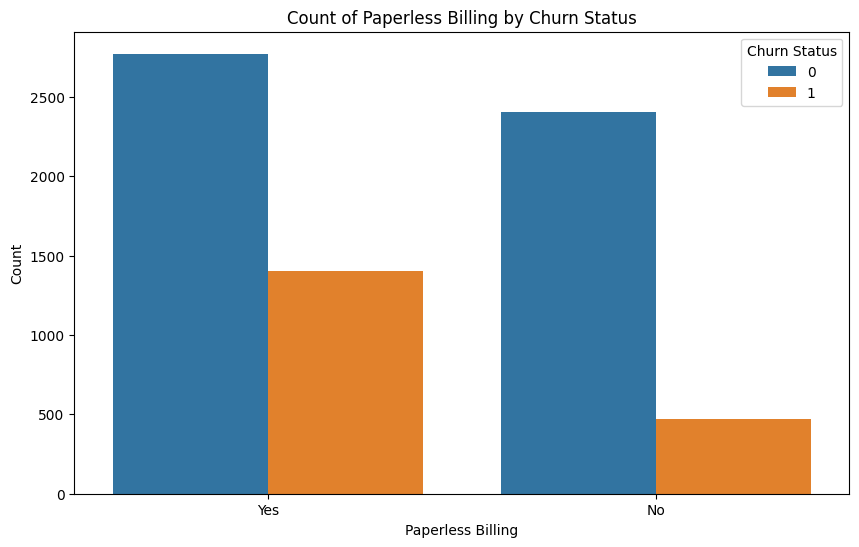

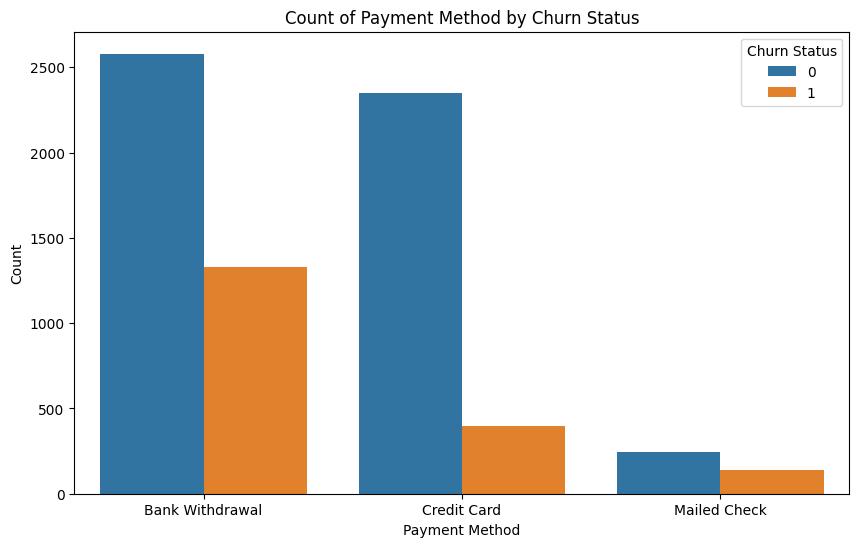

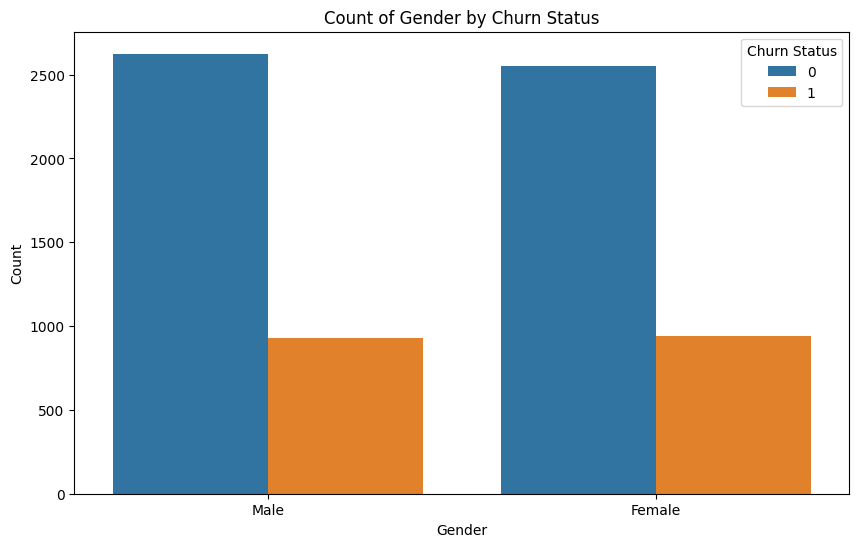

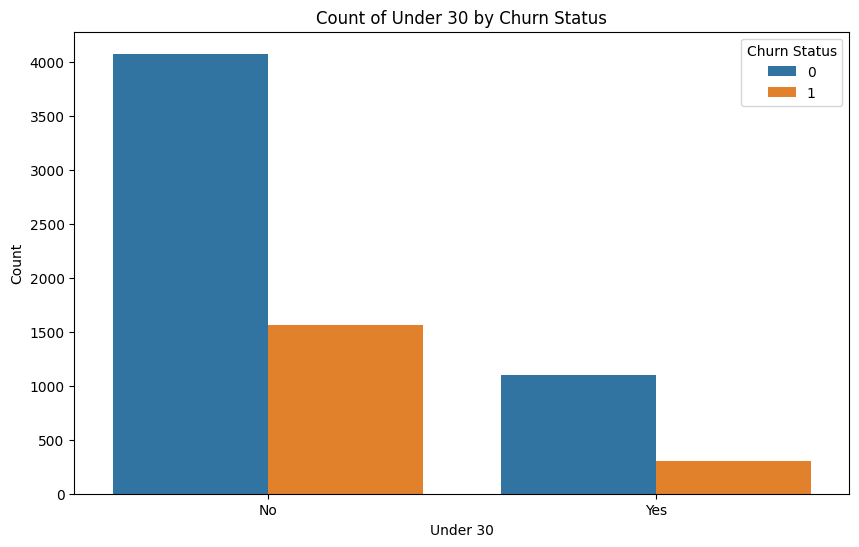

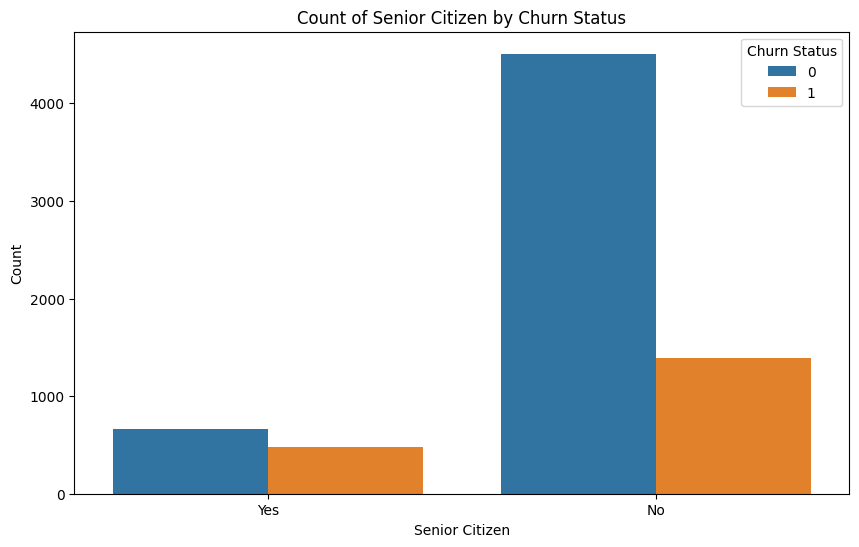

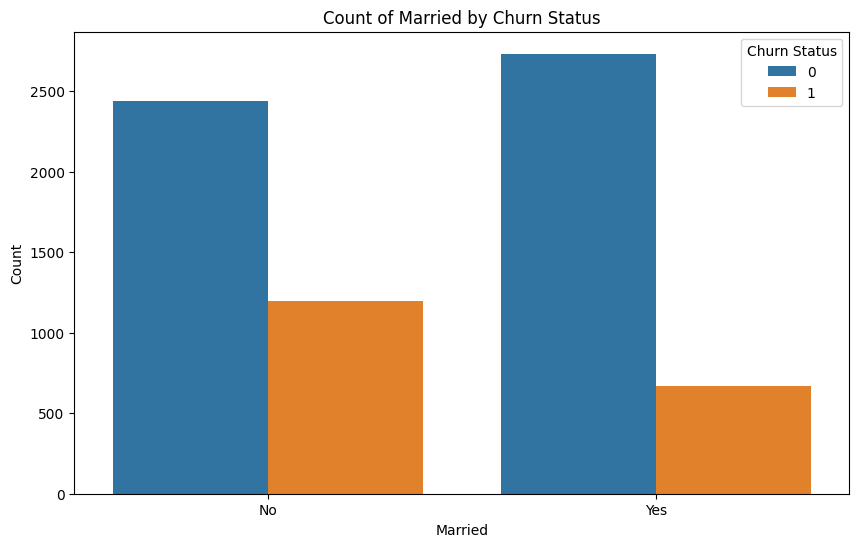

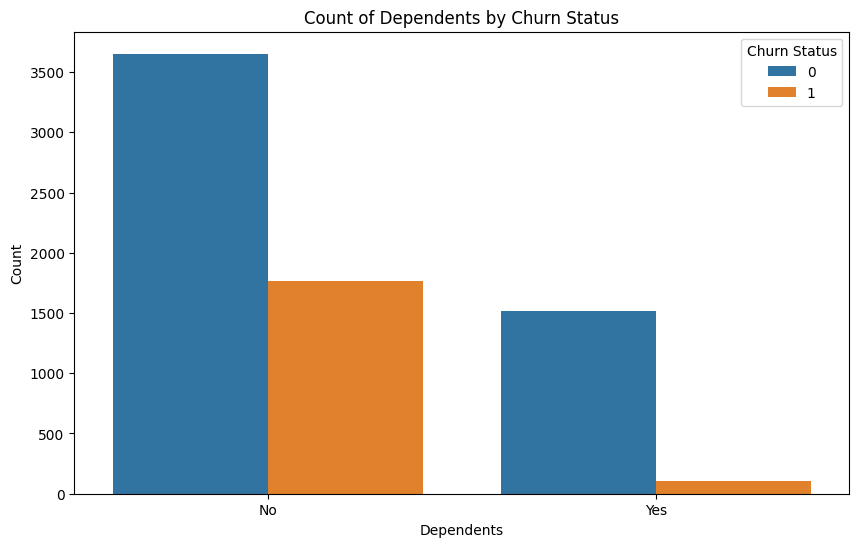

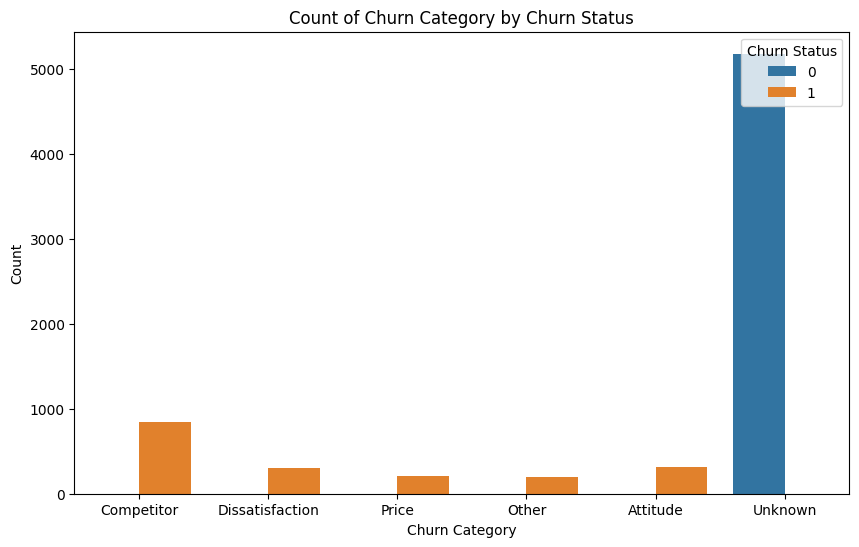

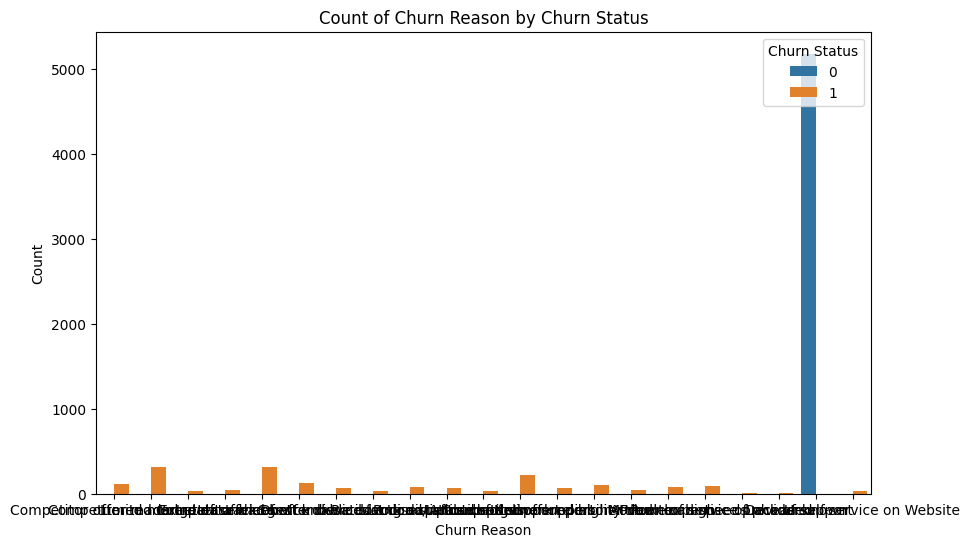

In [42]:



# List of categorical features
categorical_features = ['Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Gender', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'Churn Category',
       'Churn Reason']
# Loop through each feature and create bar plots
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Churn Status', data=df)
    plt.title(f'Count of {feature} by Churn Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Churn Status', loc='upper right')
    plt.show()


This code snippet will generate individual bar plots for each categorical feature, showing the count of each category with different colors representing "Churn Status" (0 or 1). 


# we want sort the best categorical features that will impact on the churn status. i am using chi square test.The chi-square test helps  to solve the problem in feature selection by testing the relationship between the features.we need to determine the relationship between the  categorical  features and churn status (target variable. In feature selection, we aim to select the features which are highly dependent on the response.
 higher the Chi-Square value the feature is more dependent on the churn status and it can be selected for model training.

Before performig Ch-Square test we have to make sure data is label encoded
there are 2 types of encoding  one hot and label encoding
ne-hot encoding is particularly useful for features that have categories with no ordinal relationship. Features with no ordinal relationship means that the categories don't have a natural order or ranking..

Label encoding is a technique for handling categorical data in machine learning. label encoding will represent categorical variables having ordinal relationship among them. Here Referer a friend column conatins.

In [43]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Gender', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'Churn Category',
       'Churn Reason'],
      dtype='object')

In [44]:

from sklearn.preprocessing import LabelEncoder

 #categorical columns for label encoding
categorical_features = ['Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Gender', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'Churn Category',
       'Churn Reason']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label encode each categorical feature
for column in categorical_features:
    df[column] = label_encoder.fit_transform(df[column])

#The for loop iterates over each column name in categorical_features.
#df[column] = label_encoder.fit_transform(df[column]): For each categorical feature, it applies the fit_transform method 
#of the LabelEncoder to label encode the values in that column.

# Display the updated DataFrame with label-encoded categorical features
print(df[categorical_features])







      Referred a Friend  Offer  Phone Service  Multiple Lines  \
0                     0      0              0               0   
1                     1      5              1               1   
2                     0      4              1               1   
3                     1      3              1               0   
4                     1      3              1               1   
...                 ...    ...            ...             ...   
7038                  0      0              1               0   
7039                  1      3              1               1   
7040                  1      0              1               1   
7041                  1      0              0               0   
7042                  0      0              1               0   

      Internet Service  Internet Type  Online Security  Online Backup  \
0                    1              2                0              0   
1                    1              0                0              1   


In [45]:
from sklearn.feature_selection import chi2



# the label-encoded categorical features
categorical_features = ['Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Gender', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'Churn Category',
       'Churn Reason']

# Performing the Chi-Square test
chi2_scores, p_values = chi2(df[categorical_features], df['Churn Status'])
#The chi2 function is applied to the label-encoded categorical features (df[categorical_features]) and 
#the target variable.

results = pd.DataFrame({'Chi2 Score': chi2_scores, 'P-value': p_values}, index=categorical_features)
print(results)


                          Chi2 Score        P-value
Referred a Friend          84.968853   3.031024e-20
Offer                     243.150502   8.086743e-55
Phone Service               0.097261   7.551421e-01
Multiple Lines              6.548512   1.049719e-02
Internet Service           79.251371   5.468939e-19
Internet Type             622.130315  2.572899e-137
Online Security           147.295858   6.761696e-34
Online Backup              31.217694   2.306541e-08
Device Protection Plan     20.226662   6.878750e-06
Premium Tech Support      135.559783   2.490549e-31
Streaming TV               17.334235   3.134881e-05
Streaming Movies           16.242531   5.572887e-05
Streaming Music             9.466142   2.092991e-03
Unlimited Data             90.618078   1.742609e-21
Contract                 1273.246919  7.363558e-279
Paperless Billing         105.680863   8.661987e-25
Payment Method             92.448101   6.911369e-22
Gender                      0.258699   6.110156e-01
Under 30    

Chi2 Score: This is the test statistic calculated by the Chi-Square test. Higher values indicate a stronger association between the categorical feature and the target variable.

P-value: This is the probability of observing a Chi2 statistic as extreme as, or more extreme than, the one calculated from the sample data, assuming that the null hypothesis is true. A lower p-value suggests stronger evidence against the null hypothesis.

In the context of the Chi-Square test for independence, the null hypothesis ((H_0)) typically assumes that there is no association or dependence between the categorical variables under consideration. In this case, it means that there is no relationship between the individual categorical features and the target variable 'Churn Status'.

H_0: There is no association between the categorical feature and 'Churn Status'.

the alternative hypothesis  (H_a)suggests that there is a significant association or dependence between the categorical features and 'Churn Status'. A rejection of the null hypothesis implies that there is evidence in favor of a relationship.

The Chi-Square test calculates a test statistic (Chi2) and a p-value.  the p-value wes chosen significance level (commonly 0.05),

So, in the output we gor :

- If p  v alue < 0.05,  reject the null hypothesis for that particular feature, suggesting an association with 'Churn Status'.
- If p value >= 0.05, fail to reject the null hypothesis, suggesting no significant association.



Given a significance level of 0.05, features with p-values greater than 0.05 as not having a significant association with 'Churn Status'. Let's identify those features:

1. **Phone Service:**
   - Chi2 Score: 0.097261
   - P-value: 0.7551421 (greater than 0.05)

2. **Gender:**
   - Chi2 Score: 0.258699
   - P-value: 0.6110156 (greater than 0.05)

These features have p-values greater than 0.05, suggesting that, at the 0.05 significance level, there is not enough evidence to reject the null hypothesis of no association with 'Churn Status' for these features. Therefore, based on the chosen significance level, 'Phone Service' and 'Gender' are the features that do not have a significant association with 'Churn Status'.

In [46]:
# Drop 'Gender' and 'Phone Service' columns from the DataFrame
df = df.drop(['Gender', 'Phone Service'], axis=1)



In [47]:
df.columns

Index(['Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Regular Charges',
       'Total Long Distance Charges', 'Age', 'Under 30', 'Senior Citizen',
       'Married', 'Dependents', 'Churn Status', 'CLTV', 'Churn Category',
       'Churn Reason', 'Total Customer Svc Requests',
       'Product/Service Issues Reported', 'Customer Satisfaction rate'],
      dtype='object')

In [48]:
df.shape[1]

33

In [ ]:
df.head()

In [ ]:
df1=df.copy()
df1
#just making a copy for model implementation

so nowonwards in he beginning we had 43 features after sorting out with correlation matrice and chi square test now we are using 33 fetureas against our churn status  for applying classification machine learning algorithms.

Before applying machine model  machine  model cannot handle categorical variables directly. machine learning algorithms requires numerical input features.

so we  need to encode categorical variables into numerical format using techniques such as one-hot encoding or label encoding or binry encoding accoording type or values of the features 

# One-hot encoding is 
used to represent categorical variables as binary vectors. It is applied when a categorical feature has more than two categories and doesn't have a meaningful ordinal relationship between the categories. One-hot encoding creates binary columns for each category and represents the presence or absence of a category with a 1 or 0, respectively.

In  dataset, the following features are suitable for one-hot encoding:

Contract: 'Month-to-Month' has three categories: 'Month-to-Month', 'One Year', and 'Two Year'. One-hot encoding creates separate binary columns for each category.

Payment Method: 'Bank Withdrawal' and 'Credit Card' are the payment methods. One-hot encoding represents each method with a binary column.

Churn Reason: 'Competitor offered more data' and 'Competitor made a better offer' are reasons for churn. One-hot encoding creates separate binary columns for each reason.

In [ ]:

df_encoded = pd.get_dummies(df, columns=['Contract', 'Payment Method', 'Churn Reason'])

# Display the encoded DataFrame
df_encoded

# Label encoding 
is typically used when dealing with categorical variables that have an ordinal relationship, meaning there is some inherent order or ranking among the categories. In label encoding, each unique category is assigned a numerical label.

In [ ]:
from sklearn.preprocessing import LabelEncoder



label_encoder = LabelEncoder()

columns_to_label_encode = [
    'Referred a Friend', 'Multiple Lines', 'Internet Service', 'Online Security',
    'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
    'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data',
    'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Paperless Billing'
]

for column in columns_to_label_encode:
    df[column] = label_encoder.fit_transform(df[column])
    
#This loop iterates through each specified column in columns_to_label_encode and applies label encoding using 
#the fit_transform method.

# Print label-encoded features
print("Label-encoded features:")
for column in columns_to_label_encode:
    print(f"{column}: {df[column].unique()}")

# Logistic Regression

Logistic regression is a statistical method used for predicting categorical outcomes. It is a supervised learning algorithm that is closely related to linear regression but adapted for binary or multi-class classification problems.here we are implementing binary logistic gression   as there are  only 2 possible outcomes that is churn status yes or no.that is the The goal of our project


In [ ]:
df1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming 'Churn Status' is the target variable
x = df1.drop('Churn Status', axis=1)  # Features
y = df1['Churn Status']  # Target variable

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)




x and y: These are your feature matrix (x) and target variable (y) that we want to split.

train_size=0.8 means 80% of the data will be used for training, and the remaining 20% will be used for testing.

x_train, x_test, y_train, y_test: These are the resulting datasets after the split. x_train and y_train are the features and target variable for the training set, and x_test and y_test are for the testing set.


In [ ]:
#creating logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
#training
model.fit(x_train, y_train)

In [ ]:
model.score(x_test,y_test)

In [ ]:
y_pred = model.predict(x_test)
y_pred

this array says the predicted classes for each corresponding sample in our test set.

Each value in the array corresponds to the predicted class for a particular sample.
the classes are  coded as 0 and 1.
0 means  non-churn and 1 means  churn).
For example, the first sample in  test set is predicted as class 0, the second as class 0, and so on.

# Evalaution of model

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

the accuracy score is 0.97090, which means that our model correctly predicted the labels for approximately 97.09% of the samples in the `y_test` set when compared to the corresponding predictions in `y_pred`. In other words, the model's predictions were accurate for about 97.09% of the instances in the test set.



In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')


The F1 score is a metric commonly used in classification problems,  It combines precision and recall into a single value and provides a balance between the two.

 **Precision**:
   - Precision is the ratio of true positive predictions to the total number of positive predictions made by the model.
   - It measures the accuracy of the positive predictions.
   - The formula for precision is: Precision = True Positives/ True Positives + False Positives
   - A high precision indicates that when the model predicts a positive class, it is likely to be correct.

 **Recall 
   - Recall is the ratio of true positive predictions to the total number of actual positive instances in the dataset.
   - It measures the ability of the model to capture all the positive instances.
   -Recall = True Positives / True Positives + False Negatives
   - A high recall indicates that the model is effective at identifying most of the positive instances.

 a F1 score of 0.9406657018813315 suggests that both precision and recall are high. This means that when your model predicts a positive instance, it is likely to be correct (high precision), and it is also effective at capturing most of the positive instances in the dataset (high recall). These are positive indicators of a well-performing classification model.
 
The F1 score ranges from 0 to 1, where 1 indicates perfect precision and recall, and 0 indicates the worst possible performance.


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')


In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
#annot=True argument adds the numerical annotations, and fmt="d" specifies the format of the annotations as integers. 
#The cmap="Blues" argument sets the color map to shades of blue.cbar=colour bar in side

# Add labels and title
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

plt.show()


A confusion matrix is a table that is  used to evaluate the performance of a classification model. It shows a summary of the number of correct and incorrect predictions made by the model compared to the actual outcomes .



- **True Positives (TP):** 325
  - The model correctly predicted 325 instances where the actual outcome was positive (Churn Status = 1).
  325 customers is predicted to churn , 325 customers will depart

- **True Negatives (TN):** 1043
  - The model correctly predicted 1043 instances where the actual outcome was negative (Churn Status = 0).
  This means that the model identified 1043  customers are predicted to not churn, customers will stay

- **False Positives (FP):** 6
  - The model incorrectly predicted 6 customers as positive when the actual outcome was negative.
 the model made a mistake by classifying 6 instances as churn when, in reality, those customers not churn or not depart. 

- **False Negatives (FN):** 35
  - The model incorrectly predicted 35 customers as negative when the actual outcome was positive.
  the model failed to identify customers who actually churned or depaeted
   False Negatives (FN) mean that the model failed to identify  35 customers who actually churned or departed. These are instances where the model predicted a negative outcome (did not churn), but the actual outcome was positive (churned). In other words, the model missed predicting instances of churn.



# Decision Tree

A decision tree is a supervised learning algorithm that can be used for classification and regression modeling, but mostly it is preferred for solving Classification problems
It is a flowchart-like tree structure where each internal node denotes the feature, branches denote the rules and the leaf nodes denote the result of the algorithm
It is called as decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure


In [ ]:
df2=df1.copy()
df2

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming 'Churn Status' is the target variable
x = df1.drop('Churn Status', axis=1)  # Features
y = df1['Churn Status']  # Target variable

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)




In [ ]:
# Create a decision tree classifier
dt_model = DecisionTreeClassifier(criterion='entropy')



 creating aa `DecisionTreeClassifier` class from scikit-learn and specifying the criterion for splitting nodes as 'entropy'.

Entropy is a measure of impurity or disorder in a set of data. it represents the uncertainty associated with a set of labels.
Higher entropy indicates more disorder and less homogeneity in the labels within a set.
Information Gain:
Information Gain is used to decide the best way to split the data at each node in a decision tree.
It measures the reduction in entropy after a dataset is split based on a particular feature.
The goal is to choose the split that maximizes the reduction in uncertainty, making the resulting subsets more homogenous.

Decision Tree Splitting Process:
At each node of the decision tree, the algorithm evaluates different features and their potential splits to find the one that maximizes Information Gain.The Information Gain is calculated by comparing the entropy of the dataset before and after the split. A higher Information Gain indicates a more effective split.

we  configuring the decision tree classifier to use the 'entropy' criterion, indicating that the algorithm should choose splits that maximize Information Gain, thereby reducing uncertainty and improving the predictive power of the model.

In [ ]:
# Train the model
dt_model.fit(x_train, y_train)

# Convert feature names to a list to avoid error
#creating a list called feature_names_list containing the column names of  feature matrix 
#list(x.columns) converts to a Python list, so feature_names_list becomes a list containing 
#the names of all the features in  dataset.

feature_names_list = list(x.columns)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=feature_names_list, class_names=['Not Depart/Churn', 'Churn/Depart'], filled=True, rounded=True)
plt.show()

Churn reason <= 19.5, entropy = 0.84, samples = 5634, value = [4117, 1517], class = Not Depart/Churn

This node is a parent node node, and it's splitting the data based on the feature "Churn reason orstatus"

- **Feature and Threshold:** `Churn reason <= 19.5` - This is the condition used for splitting the data at this node. If the value of the feature "Churn reason" is less than or equal to 19.5, the data goes to one branch; otherwise, it goes to the other.
this value the algorithm automatically during the testing process .it automatically determines the best feature and threshold for each decision node based on a criterion, here it is entropy.

- **Entropy:** `entropy = 0.84` - This is a measure of impurity in the node. Lower entropy indicates more purity, and in decision trees, the algorithm seeks to minimize entropy. An entropy of 0 would mean that all samples in the node belong to a single class.

- **Samples:** `samples = 5634` - This is the number of samples in the node before the split.

- **Value:** `value = [4117, 1517]` - This shows the distribution of target classes in the node. In this case, there are 4117 samples labeled as "Not Depart/Churn" and 1517 samples labeled as "Churn/Depart."

- **Class:** `class = Not Depart/Churn` - This indicates the majority class in the node.

Then,  this node is split into two child nodes:

1. **Left Child Node:**
   - `entropy = 0.0` - The entropy is now 0, meaning that all samples in this node belong to a single class.
   - `samples = 1517` - Number of samples in this node.
   - `value = [0, 1517]` - All 1517 samples are labeled as "Churn/Depart."
   - `class = Churn/Depart` - The class of this node is "Churn/Depart."

2. **Right Child Node:**
   - `entropy = 0.0` - Again, entropy is 0, indicating pure classification.
   - `samples = 4117` - Number of samples in this node.
   - `value = [4117, 0]` - All 4117 samples are labeled as "Not Depart/Churn."
   - `class = Not Depart/Churn` - The class of this node is "Not Depart/Churn."




From this we can say that
- 1517 customers are predicted to churn or depart.
- 4117 customers are predicted not to depart or have no churn status.



# evaluation of model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


accuracy = accuracy_score(y_test, y_pred)

accuracy

This means that the decision tree model, as evaluated test set, correctly predicted the target variable (Churn Status) for about 62.2% of the datapoints that is customers

In [ ]:
precision = precision_score(y_test, y_pred)
precision

Precision: 0.235 means that of all the instances predicted as "Churn/Depart" by the model, approximately 23.5% of them are true positives (actual cases of churn). 

In [ ]:
recall = recall_score(y_test, y_pred)
recall

the model correctly identified approximately 22.7% of them as positive predictions. The rest might be false negatives (actual cases of churn that the model missed).

In [ ]:

f1 = f1_score(y_test, y_pred)
f1 

The F1 score  is 0.23, or 23%. The F1 score is the  mean of precision and recall, providing a balance between the two metrics.it means that the model achieves a balanced performance between precision and recall. It considers both false positives and false negatives.


In [ ]:

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix 


In provided confusion matrix:

- True Negatives (TN): 796
- False Positives (FP): 261
- False Negatives (FN): 272
- True Positives (TP): 80

- **True Negatives (TN):** Instances correctly predicted as "Not Depart/Churn" (796 instances). which means  It that 796 instances, which are negative (not departing or not having churn status), were correctly identified by the model as negative.wrong as wrong
- **False Positives (FP):** Instances predicted as "Churn/Depart" but actually "Not Depart/Churn" (261 instances).won't depart but predicted as  depart
- **False Negatives (FN):** Instances predicted as "Not Depart/Churn" but actually "Churn/Depart" (272 instances).
- **True Positives (TP):** Instances correctly predicted as "Churn/Depart" (80 instances).the model correctly identified 80 instances as "Churn/Depart."



# Random Forest

 Random Forest is a machine learning model. which is also an ensemble learning method that can be used for both classification and regression tasks. The algorithm works by constructing a multitude of decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees for input data. simply random forest is a ensemble laerning method which contains multiple decision trees ie multiple models

In [ ]:
df3=df1.copy()
df3

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

x = df3.drop('Churn Status', axis=1)  # Features
y = df3['Churn Status']  # Target variable

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


n_estimators=100: This means the number of decision trees in the forest. it's set to 100, meaning the Random Forest will consist of 100 decision trees.

In [ ]:
 #Train the model
rf_model.fit(x_train, y_train)




first  fits (trains) the Random Forest model on the training data (x_train features and y_train target variable). The fit method is used to train the model by providing it with the input features (x_train) and the corresponding target labels (y_train).

In [ ]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(x_test)
y_pred_rf


After training, the model is used to make predictions on the test set (x_test features). The predict method takes the features of the test set and returns predicted labels (y_pred_rf) based on the trained Random Forest model.

The resulting y_pred_rf array contains the predicted labels for each instance in the test set.  it appears to contain binary predictions (0 or 1) for each instance, where 0 is "Not Depart/Churn," and 1 is "Churn/Depart."

# Evaluation

In [ ]:

# Evaluating the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)


print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")
print(f"Random Forest F1 Score: {f1_rf}")
print(f"Random Forest Confusion Matrix:\n{conf_matrix_rf}")


 **Accuracy:**
   - **Random Forest Accuracy:** 1.0 means that the model correctly predicted all instances in the test set. It achieved 100% accuracy.

 **Precision:**
   - **Random Forest Precision:** 1.0 means that of all instances predicted as "Churn/Depart," every single one was a true positive. There were no false positives.
 **Recall:**
   - **Random Forest Recall:** 1.0 means that the model correctly identified all actual instances of "Churn/Depart." There were no false negatives.

 **F1 Score:**
   - **Random Forest F1 Score:** 1.0 means that the model achieved a perfect balance between precision and recall. It is the harmonic mean of precision and recall.

 **Confusion Matrix:**
  
   - All values are in perfect predictions.
  
   - The top-left corner (1042) represents true negatives (TN), meaning instances correctly predicted as "Not Depart/Churn."
   - The bottom-right corner (0) represents true positives (TP), meaning instances correctly predicted as "Churn/Depart."
   - There are no false positives (FP) or false negatives (FN) in this confusion matrix.

In summary, the Random Forest model is performing  well on the test set, achieving perfect predictions for both classes. 

# SVM -Support vector machine 

Support Vector Machine (SVM) is a supervised machine learning model used for classification and regression tasks. The primary objective of an SVM is to find a hyperplane that best separates the data into different classes while maximizing the margin between the classes. The margin is defined as the distance between the hyperplane and the nearest data point from each class.


1. **Hyperplane:**  a hyperplane is a straight line that divides the data into two classes.

2. **Support Vectors:**  are the data points that are closest to the hyperplane and have the maximum influence on its position. The margin is computed based on these support vectors.

3. **Margin:** The margin is the distance between the hyperplane and the nearest data point from each class. SVM aims to find the hyperplane that maximizes this margin.


In [ ]:
# Create an SVM classifier with a linear kernel
svm_model = SVC(kernel='linear')



This code creates a the SVC (Support Vector Classification) class from scikit-learn, which represents a Support Vector Machine (SVM) classifier.                                                                                                             The kernel parameter specifies the type of kernel to be used by the SVM. , kernel='linear' indicates we use  a linear kernel.
A linear kernel is used when linearly separable in the feature space. It means the decision boundary between classes is a hyperplane. a hyperplane is a decision boundary that separates different classes  here churn or not churn class in the feature space.

In [ ]:
# Train the SVM model
svm_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(x_test)

y_pred_svm

we use the predict method to obtain predictions for the test set (x_test). 

**Evaluation**

In [ ]:

# Evaluating the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)


# Print or use the evaluation metrics as needed
print(f"SVM Accuracy: {accuracy_svm}")
print(f"SVM F1 Score: {f1_svm}")




- **SVM Accuracy:** Accuracy is a measure of the overall correctness of the model. It is the ratio of correctly predicted instances to the total instances.  the SVM model achieved an accuracy of 0.95 or 95%.

- **SVM F1 Score:** The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall, especially when there is an imbalance between the classes. A higher F1 score indicates a better balance.  the SVM model achieved an F1 score of approximately 0.95.


In [ ]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
conf_matrix_svm 


- **True Negatives (TN):** 10 instances were correctly identified as "No Churn."
- **False Positives (FP):** 1 instance was incorrectly identified as "Churn/depart" when it was actually "No Churn."
- **False Negatives (FN):** 0 instances were incorrectly identified as "No Churn" when they were actually "Churn/depart."
- **True Positives (TP):** 9 instances were correctly identified as "Churn/customer will depart."



SVM model had well performance in correctly classifying instances of customer churn. The high accuracy, F1 score, and the distribution of instances in the confusion matrix indicate that the model is effective in making accurate predictions.








# Conclusion


- The Random Forest model has achieved perfect accuracy (100%) and F1 score (1.0), indicating excellent performance on the given dataset. It has correctly classified all instances in the test set.
  
- The Support Vector Machine (SVM) model has also performed very well with a 95% accuracy and a high F1 score of 0.95. The confusion matrix shows a good balance of true positives and true negatives.

- The Logistic Regression model has a high accuracy of 96.8% and a respectable F1 score of 0.937.

- The Decision Tree model, on the other hand, has a lower accuracy (62%) and F1 score (0.25). The confusion matrix indicates a significant number of false positives and false negatives.

- The Random Forest and SVM models stand out as the top performers based on the provided metrics.
  
- Logistic Regression also shows strong performance, especially in terms of accuracy and F1 score.

- The Decision Tree model, while providing insights into the data, appears to have limitations in terms of accuracy and F1 score.

Hence , The Random Forest and SVM models seem to be the most promising for our churn status or prediction task.

# identifying factors driving customer departures and recommending customized retention strategies.

the Random Forest model performed well here in terms of accuracy and F1 score.
Hence  for identify factors which driving customer i am taking Feature importances in Random Forest  

In [ ]:
df5.columns

In [ ]:
# Get feature importances
feature_importances = rf_model.feature_importances_

feature_names = [
    'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
    'Multiple Lines', 'Internet Service', 'Internet Type',
    'Online Security', 'Online Backup', 'Device Protection Plan',
    'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
    'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
    'Payment Method', 'Monthly Charge', 'Total Regular Charges',
    'Total Long Distance Charges', 'Age', 'Under 30', 'Senior Citizen',
    'Married', 'Dependents', 'Churn Status', 'CLTV', 'Churn Category',
    'Churn Reason', 'Total Customer Svc Requests',
    'Product/Service Issues Reported', 'Customer Satisfaction rate']

# Plot feature importances for all features
plt.figure(figsize=(15, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx])
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances for Churn Status Prediction')
plt.show()


"Churn Category," "CLTV" (Customer Lifetime Value), "Churn Reason," and "Product/Service Issues Reported" have greater feature importance values, it implies that these features are more influential in predicting the churn status according to  Random Forest model.

1. **Churn Category:** If "Churn Category" has high importance, it suggests that the reasons of churn  is a strong predictor of whether a customer is likely to churn.

2. **CLTV (Customer Lifetime Value):** A high importance for CLTV indicates that the overall value a customer brings over their lifetime is a significant factor in predicting churn. Higher CLTV might be associated with lower churn probability.

3. **Churn Reason:** The feature "Churn Reason" being important suggests that the specific reasons customers provide for churning play a crucial role in predicting churn. This could include reasons such as poor service, dissatisfaction, or other factors.

4. **Product/Service Issues Reported:** If customers reporting issues with products or services have a high impact, it suggests that addressing and resolving these reported issues might be crucial for retaining customers.

It's important to note that feature importances provide a relative ranking of features within the context of the model you've trained. While they offer insights into which features are influential, they don't provide information on the direction or nature of the relationship (positive or negative).

Understanding these influential features can guide your business decisions. For instance, you might focus on improving customer satisfaction, addressing reported issues, or implementing strategies specific to different churn categories. Keep in mind that feature importance is just one aspect of model interpretation, and domain knowledge is essential for a comprehensive understanding.

In [ ]:
df7=pd.read_csv("verizonet_data.csv")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='Churn Category', hue='Churn Status', data=df7)
plt.title('Count of Churn Status by Churn Category')
plt.xlabel('Churn Category')
plt.ylabel('Count')
plt.legend(title='Churn Status')
plt.show()


High number of churn reason is "competitior".it implys that the reason for  churning of customers is due to they like competitiors service. so give customers service as the competitior gives.

other important reasons  are dissatisfaction and attitude , improve areas that may be causing customer unhappiness. Analyzing feedback, conducting surveys, and monitoring customer interactions can help for reducing churn status








In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='Product/Service Issues Reported', hue='Churn Status', data=df7)
plt.title('Count of Churn Status by Churn Category')
plt.xlabel('Product/Service Issues Reported')
plt.ylabel('Count')
plt.legend(title='Churn Status')
plt.show()


Theres a trend in depart of customereven though there is no customer issues reported.but having mre than single times issues reported customer tends to depart or churn status is yes.so we need to eradicate or reduce the number of issues reported